In [59]:
import numpy as np
import matplotlib.pyplot as plt



def Propagation(Ekxy, kx, ky, k, z, xlim=None, ylim=None):
    # Create 2D grids
    KX, KY = np.meshgrid(kx, ky)

    # Transfer function
    H = np.exp(-0.5j * (KX**2 + KY**2) * z / k)  # Example transfer function

    Ekxyz = Ekxy * H   # Apply transfer function
    Exyz = np.fft.ifft2(Ekxyz)  # Inverse Fourier transform to get spatial domain
    #Exyz = np.fft.fftshift(Exyz)  # Shift zero-frequency component to center
    x = np.fft.fftshift(np.fft.fftfreq(len(kx), d=(kx[1] - kx[0])))
    y = np.fft.fftshift(np.fft.fftfreq(len(ky), d=(ky[1] - ky[0])))
    X, Y = np.meshgrid(x,y)  # Create meshgrid for plotting

    # Now KX and KY are 2D arrays representing the grid
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, np.abs(Exyz), shading='auto', cmap='viridis')
    plt.xlim(xlim if xlim is not None else (x.min(), x.max()))
    plt.ylim(ylim if ylim is not None else (y.min(), y.max()))
    plt.colorbar(label='Energy (Ekxy)')
    plt.title('Fourier Mapping of Ekxy')
    return X, Y, Exyz

def full_propagation(Exy0, x, y, k, z, xlim=None, ylim=None):
    Ekxy = np.fft.fft2(Exy0)  # Fourier transform to get k- domain
    Ekxy = np.fft.fftshift(Ekxy)  # Shift zero-frequency component to center
    kx = np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1] - x[0])))
    ky = np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1] - y[0])))
    
    X, Y, Exyz = Propagation(Ekxy, kx, ky, k, z, xlim=xlim, ylim=ylim)

    return X, Y, Exyz

def plot_along_x_or_y_axis(X, Y, Exy, xlim=None, ylim=None):
    mid_idx = Exy.shape[0] // 2
    # Plot along x-axis
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(X[0, :], np.abs(Exy[mid_idx, :]), label='Along x-axis')
    if xlim is not None:
        plt.xlim(xlim)
    plt.title('Profile along x-axis')
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.legend()
    
    # Plot along y-axis
    plt.subplot(1, 2, 2)
    plt.plot(Y[:, 0], np.abs(Exy[:, mid_idx]), label='Along y-axis', color='orange')
    if ylim is not None:
        plt.xlim(ylim)
    plt.title('Profile along y-axis')
    plt.xlabel('y')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Rayleigh range z0: 0.05


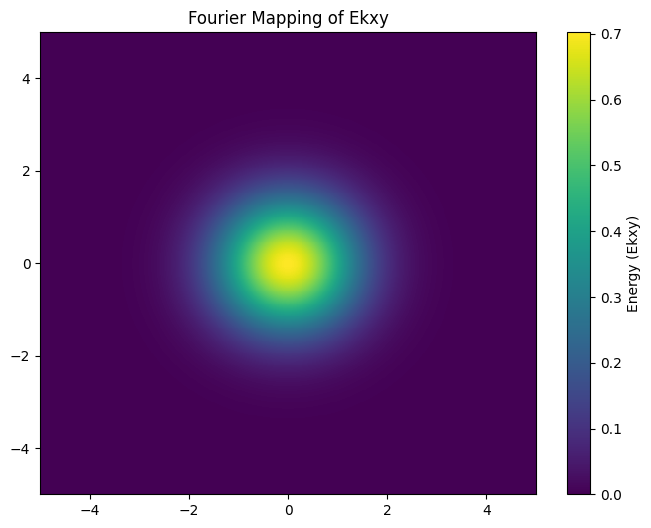

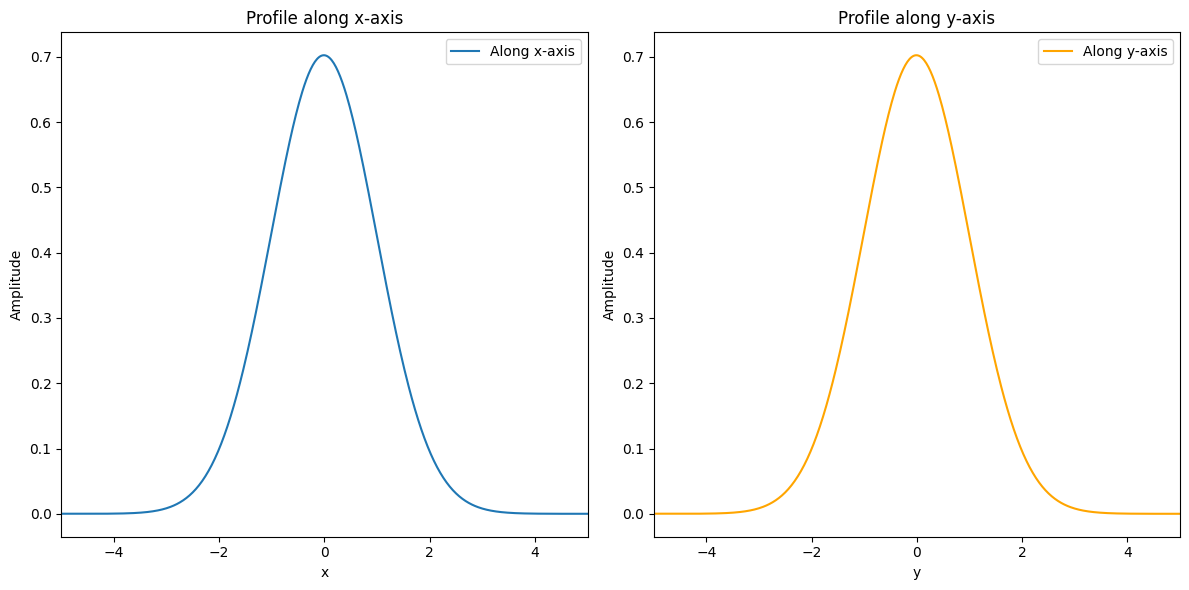

In [60]:
N = 1000 # Spatial Resolution
L = 10
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
xrange = 5
yrange = 5

# Example parameters for the beam waist and energy function
w0 = 1  # Example beam waist
Exy0 = np.exp(-(x[:, None]**2 + y[None, :]**2) / (w0**2))  # Example initial field distribution
k = 0.1  # Example wave number
z = 2  # Example propagation distance
z0 =  k*w0**2/2 # Rayleigh range
print(f"Rayleigh range z0: {z0}")
X, Y, Exyz = full_propagation(Exy0, x, y, k, z, xlim=(-xrange, xrange), ylim=(-yrange, yrange))

# Plot the results

plot_along_x_or_y_axis(X, Y, Exyz, xlim=(-xrange, xrange), ylim=(-yrange, yrange))

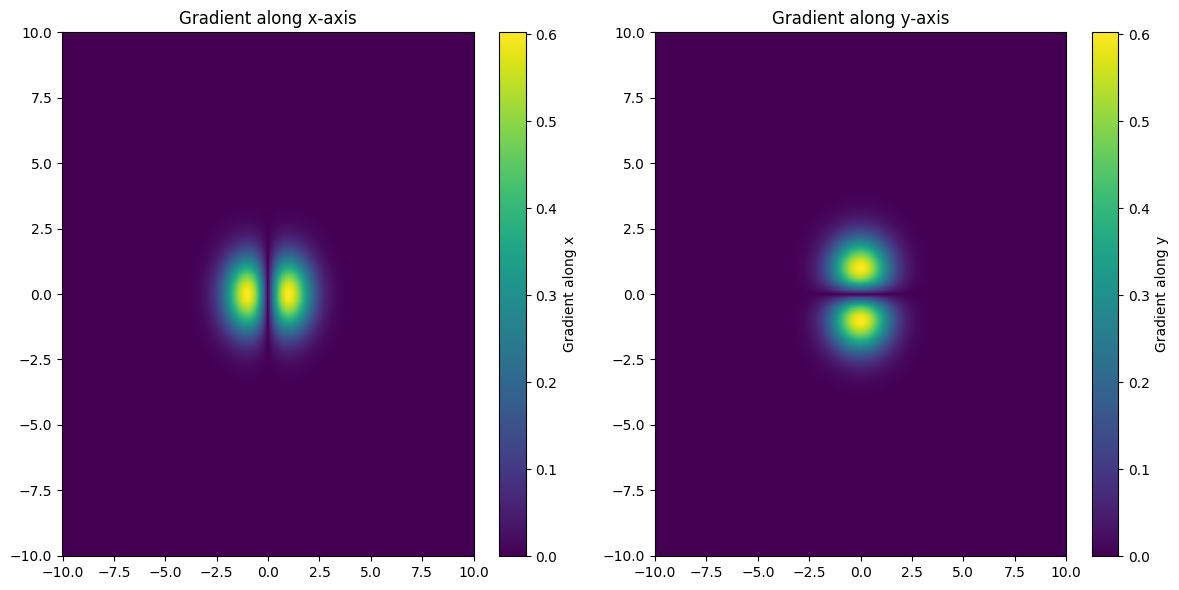

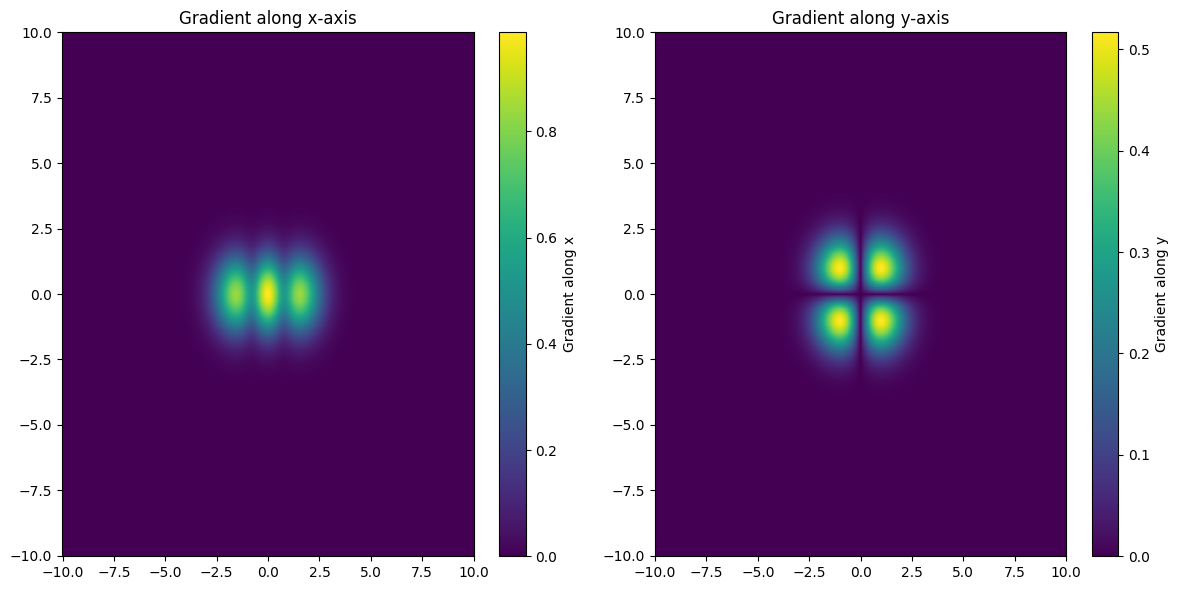

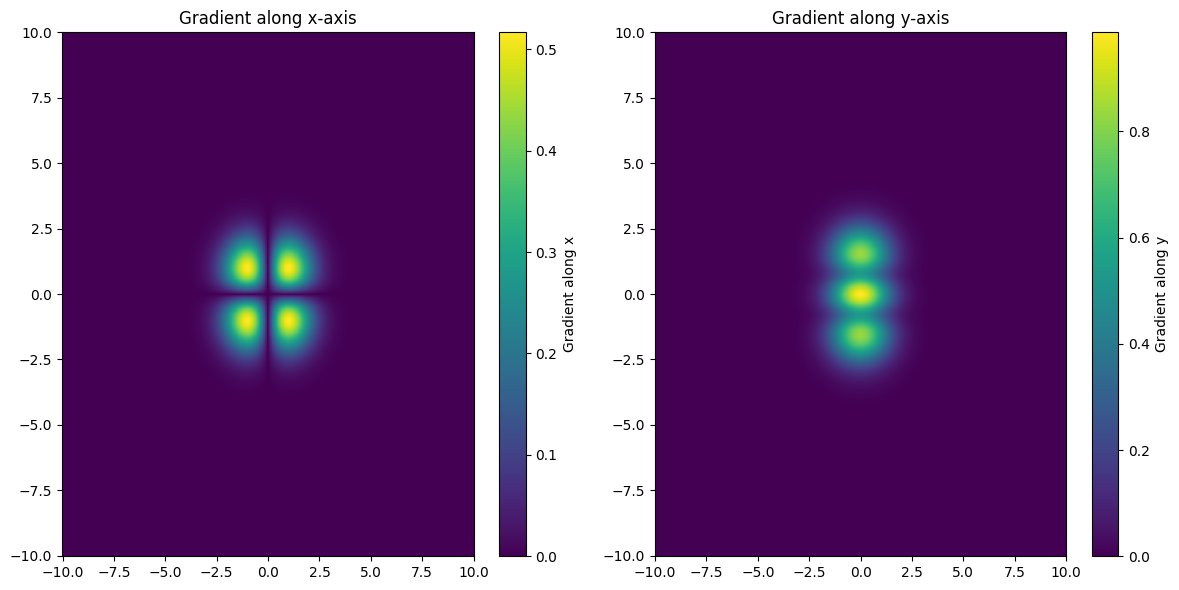

(array([[-1.11572177e-13-9.41025618e-14j, -3.87814442e-14-1.05269724e-14j,
         -1.84511216e-14+2.82002212e-14j, ...,
          2.77822513e-14-1.71397049e-14j,  1.47038980e-15+4.23526028e-14j,
         -1.13712809e-13-2.27375200e-14j],
        [-1.52528480e-14+2.48011167e-14j, -1.42015556e-14-6.15988312e-15j,
         -7.82118792e-15+4.27167863e-15j, ...,
          5.82752044e-15+6.14715224e-16j, -6.53262587e-15+2.62427351e-15j,
         -1.80832488e-14+3.22844521e-14j],
        [-3.28459485e-15+9.46011581e-14j,  4.47905527e-16+7.90675140e-15j,
         -7.81354169e-15+1.45286843e-15j, ...,
          1.15798143e-14+8.47305349e-15j, -1.16580320e-14-8.26272185e-15j,
         -1.11529591e-14+8.10391937e-14j],
        ...,
        [-2.52278900e-14-3.13838598e-14j,  9.36335697e-16+7.88255282e-15j,
         -9.13385599e-15+1.74335134e-15j, ...,
          1.24814085e-14+8.68171954e-15j, -1.25458037e-14-8.36049980e-15j,
         -2.92673301e-14-4.49184329e-14j],
        [-1.73836484e-14+2.

In [61]:
def differentiate(FXY, X, Y):
    x = X[0, :]  # Extract x-coordinates
    y = Y[:, 0]  # Extract y-coordinates

    fx = np.gradient(FXY, axis=1) / (x[1] - x[0])  # Gradient along x
    fy = np.gradient(FXY, axis=0) / (y[1] - y[0])  # Gradient along y
    return fx, fy
def plot_gradient(X, Y, FXY):
    # Calculate the gradients
    fx, fy = differentiate(FXY, X, Y)
    # Plot the gradients
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.pcolormesh(X, Y, np.abs(fx), shading='auto', cmap='viridis')
    plt.colorbar(label='Gradient along x')
    plt.title('Gradient along x-axis')
    
    plt.subplot(1, 2, 2)
    plt.pcolormesh(X, Y, np.abs(fy), shading='auto', cmap='viridis')
    plt.colorbar(label='Gradient along y')
    plt.title('Gradient along y-axis')
    
    plt.tight_layout()
    plt.show()
    return fx, fy
# Plot the gradients
fx, fy = plot_gradient(X, Y, Exyz)
plot_gradient(X,Y, fx )
plot_gradient(X,Y, fy )
